In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Contoh nilai sebenarnya dan prediksi dari model regresi Anda
y_true = np.array([2.3, 3.5, 4.2, 5.1, 6.3])  # Ganti dengan nilai sebenarnya
y_pred = np.array([2.5, 3.7, 4.1, 5.0, 6.1])  # Ganti dengan nilai prediksi

# Menghitung R square
r_square = r2_score(y_true, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Menghitung MAE
mae = mean_absolute_error(y_true, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_true, y_pred)

# Menghitung MAPE
mape = mean_absolute_percentage_error(y_true, y_pred)

# Menampilkan nilai metrik
print(f'R square: {r_square:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAPE: {mape:.2f}')


R square: 0.98
RMSE: 0.17
MAE: 0.16
MSE: 0.03
MAPE: 0.04


Accuracy: 0.85
Precision: 0.91
Recall: 0.80
F1 Score: 0.86


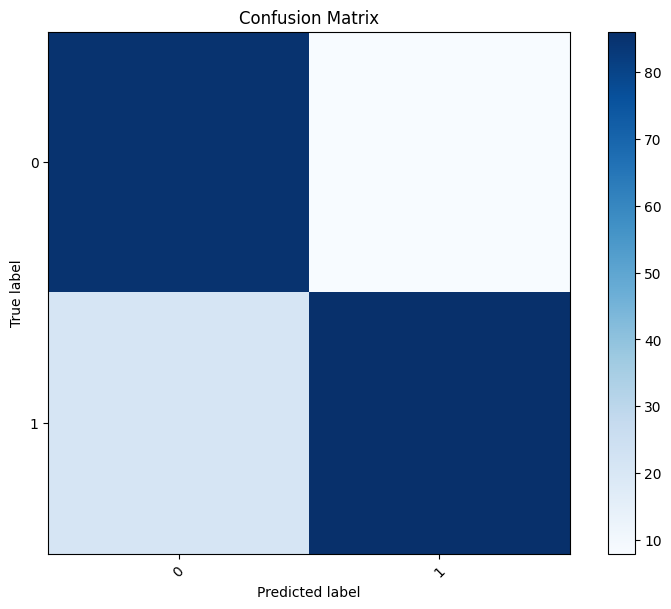

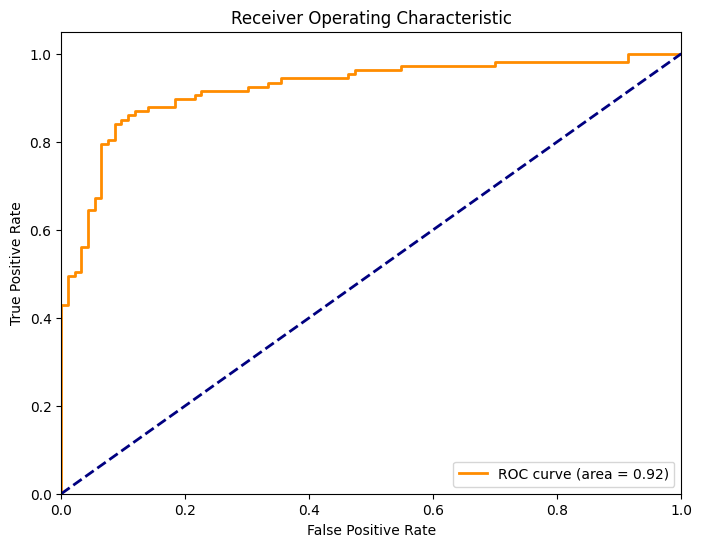

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Buat dataset (ganti dengan data Anda)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Bagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi klasifikasi
clf = LogisticRegression(random_state=42)

# Latih klasifikasi
clf.fit(X_train, y_train)

# Prediksi pada set pengujian
y_pred = clf.predict(X_test)

# Hitung metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Tampilkan metrik
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot matriks kebingungan
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1], rotation=45)
plt.yticks(tick_marks, [0, 1])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot kurva ROC
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
